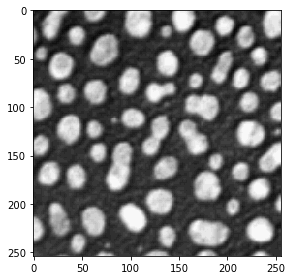

In [1]:
from napari_segment_blobs_and_things_with_membranes import *

from skimage.io import imread, imshow

blobs = imread('https://fiji.sc/samples/blobs.png')
imshow(blobs)

## Voronoi-Otsu-Labeling

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


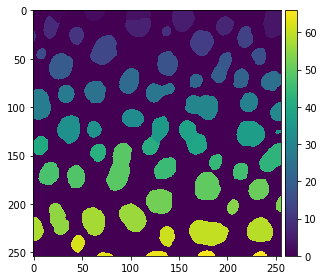

In [2]:
labels = voronoi_otsu_labeling(blobs, spot_sigma=3.5, outline_sigma=1)
imshow(labels)

## Gauss-Otsu-Labeling

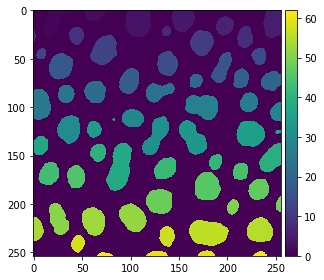

In [3]:
labels = gauss_otsu_labeling(blobs, outline_sigma=1)
imshow(labels)

## Threshold Otsu

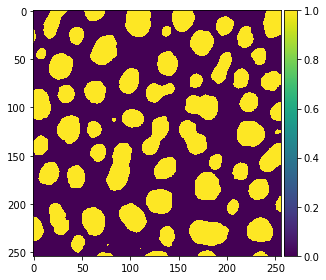

In [4]:
binary = threshold_otsu(blobs)
imshow(binary)

## Binary invert

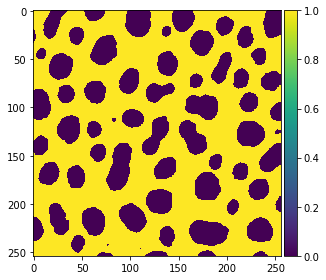

In [5]:
inverted_binary = binary_invert(binary)
imshow(inverted_binary)

## Connected component labeling

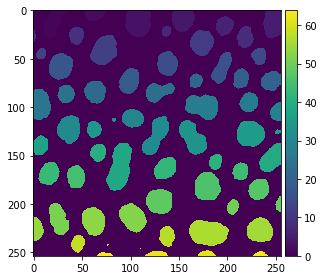

In [6]:
labels = connected_component_labeling(binary)
imshow(labels)

## Split touching objects (formerly known as binary watershed)

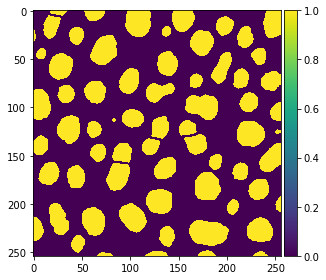

In [7]:
split_objects = split_touching_objects(binary) * 1
imshow(split_objects)

## Seeded waterhed

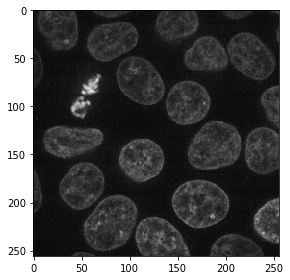

In [8]:
from skimage import data
cells = data.cells3d()

nuclei = cells[30, 1]
imshow(nuclei)

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


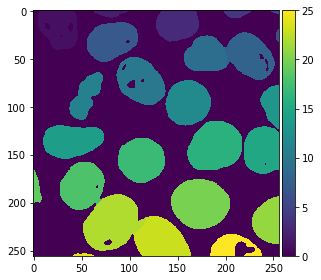

In [9]:
labeled_nuclei = voronoi_otsu_labeling(nuclei, spot_sigma=10)
imshow(labeled_nuclei)

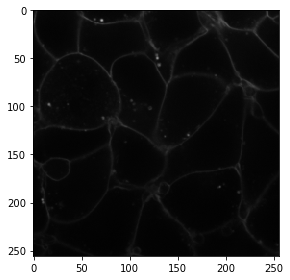

In [10]:
membranes = cells[30, 0]
imshow(membranes)

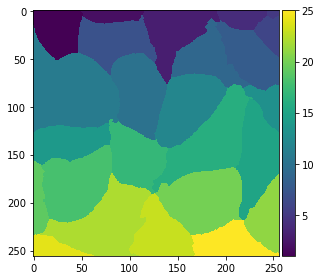

In [11]:
cells = seeded_watershed(membranes, labeled_nuclei)
imshow(cells)

## Subtract background

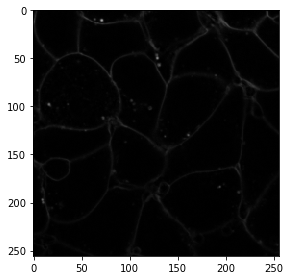

In [12]:
background_subtracted = subtract_background(membranes)
imshow(background_subtracted)

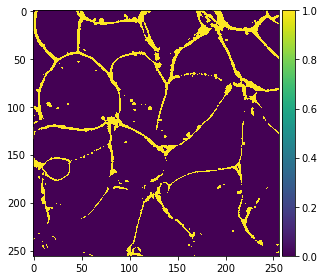

In [13]:
imshow(threshold_otsu(background_subtracted))

## Segment watershed using local minima as seeds

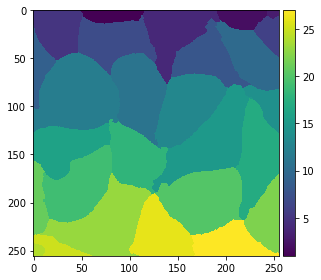

In [14]:
cells = local_minima_seeded_watershed(membranes)
imshow(cells)

## Skeletonization

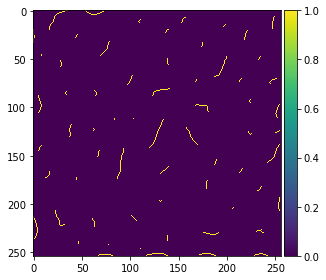

In [15]:
binary_skeleton = skeletonize(binary)
imshow(binary_skeleton * 1)

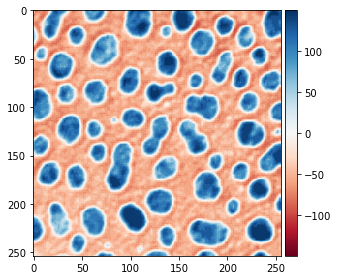

In [16]:
denoised = butterworth(blobs, cutoff_frequency_ratio=0.005, high_pass=True, order=2)
imshow(denoised)